Placenta height: 3.181642481356553
Sphere radius: 14.518876558339993
placentone_removal_sphere_radius: 30.461511238292196
placentone_removal_height: 1.8
cotyledon_wall_heights: [2.19827903,2.69906519,1.2325609 ,1.92387018,1.55749695,1.93799485]
lobule_wall_heights: [1.09913951,1.3495326 ,0.61628045,0.96193509,0.77874848,0.96899742]
Voronoi generating points : 
 [[ 6.6801457   1.1839978 ]
 [ 2.248453   -4.7815226 ]
 [-0.41532437  0.81617302]
 [ 1.2449482   6.0864235 ]
 [-5.4186901   3.7657733 ]
 [-4.6876481  -4.1060797 ]]


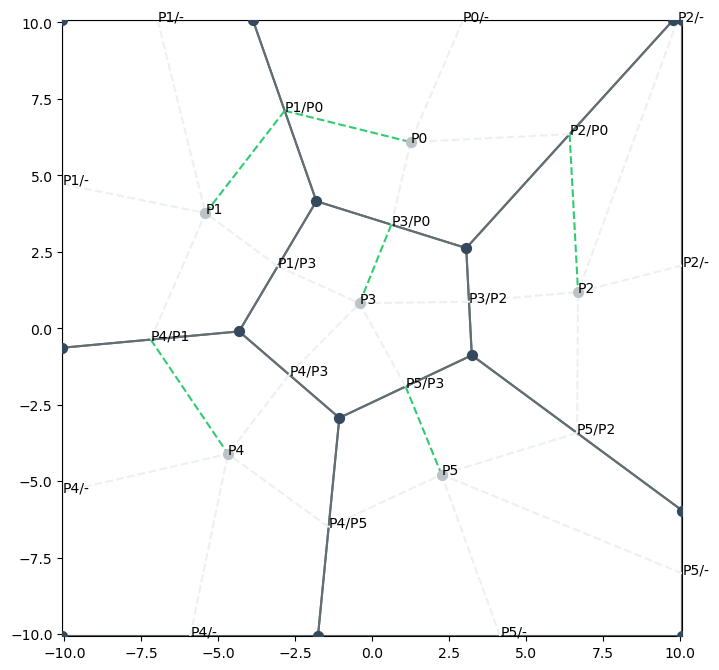

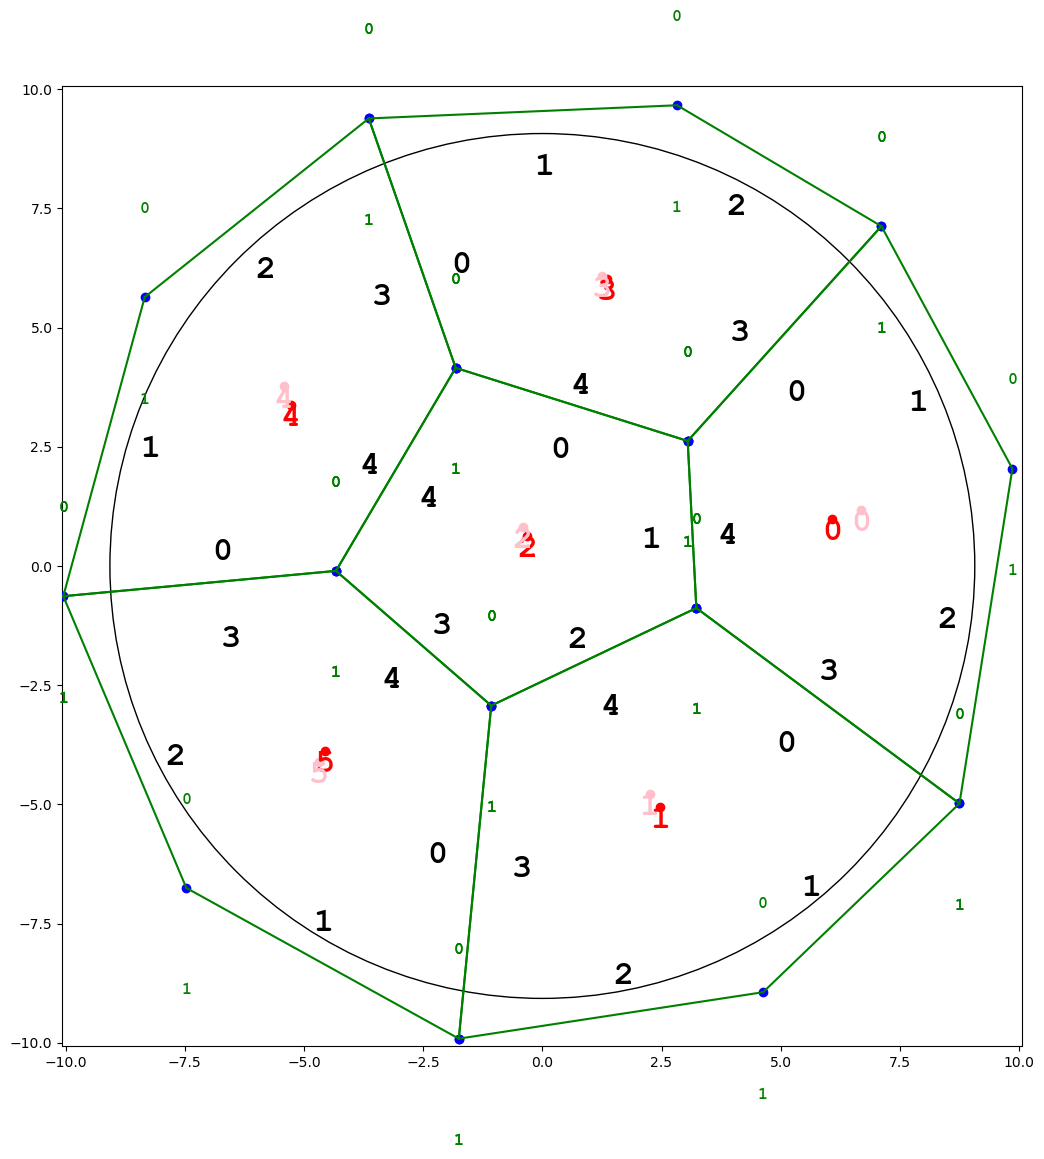

---------------------
Setting up sub placentones for 0


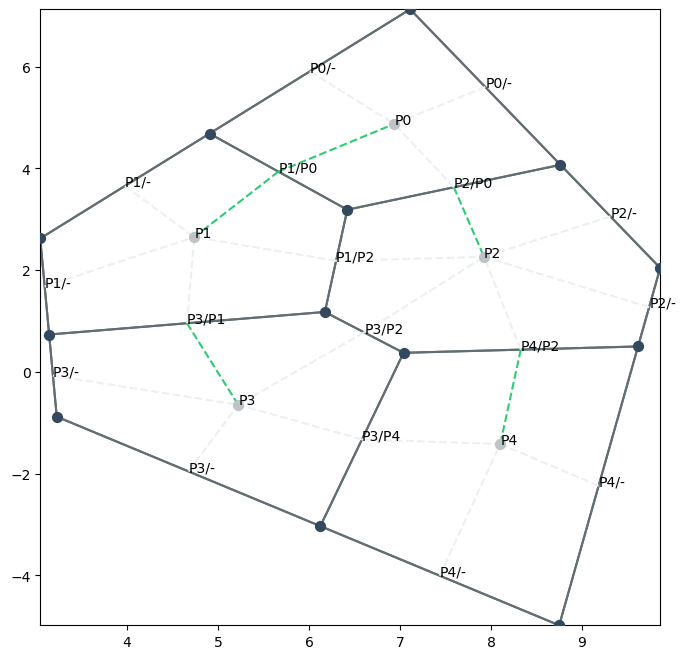

Error = 0.6049906598822163
Generating points given by: 
(7.922947769656419, 2.2603968369558234),
(4.740731665388115, 2.650483346121136),
(8.101199637089485, -1.4184065892065238),
(5.2228262373728995, -0.6464157467030984),
(6.938463506540599, 4.87354864243371)
---------------------
Setting up sub placentones for 1


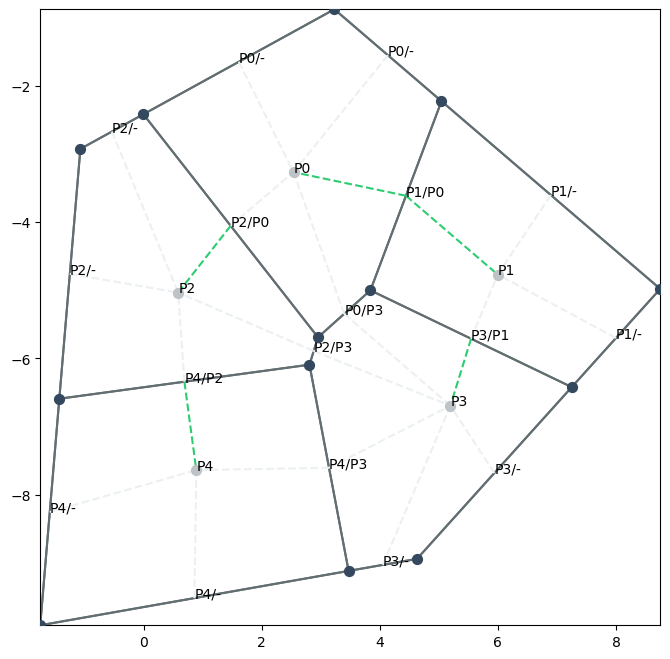

Error = 0.9130637777093333
Generating points given by: 
(5.995979256968412, -4.771082144650934),
(0.5846676193448622, -5.035739370379414),
(2.5375758303825164, -3.2701245512233332),
(5.195120770285459, -6.6951173243521085),
(0.8912677729902485, -7.638354652235618)
---------------------
Setting up sub placentones for 2


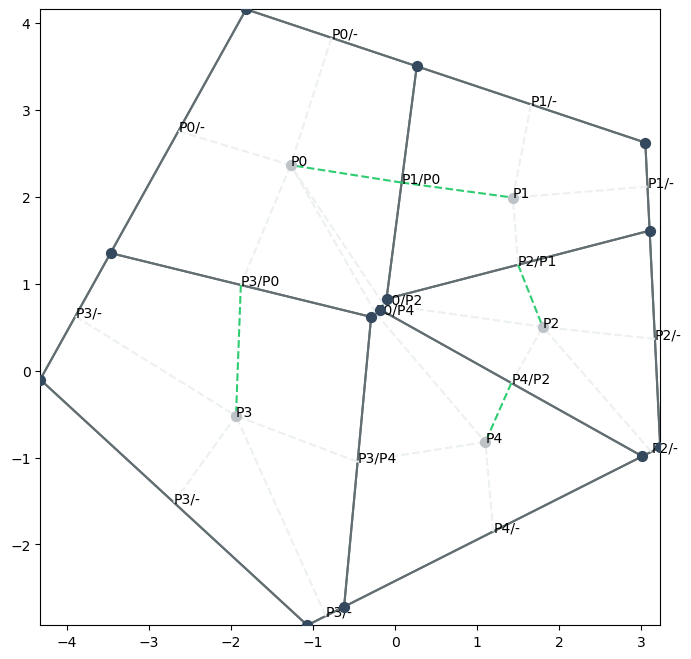

Error = 0.5224506923871884
Generating points given by: 
(1.7975566051342826, 0.5023636846256483),
(-1.274860460479787, 2.3628498293673252),
(1.433882011610101, 1.9894163389444397),
(-1.941539497056854, -0.5213808487273395),
(1.0983089969230773, -0.8221017114453167)
---------------------
Setting up sub placentones for 3


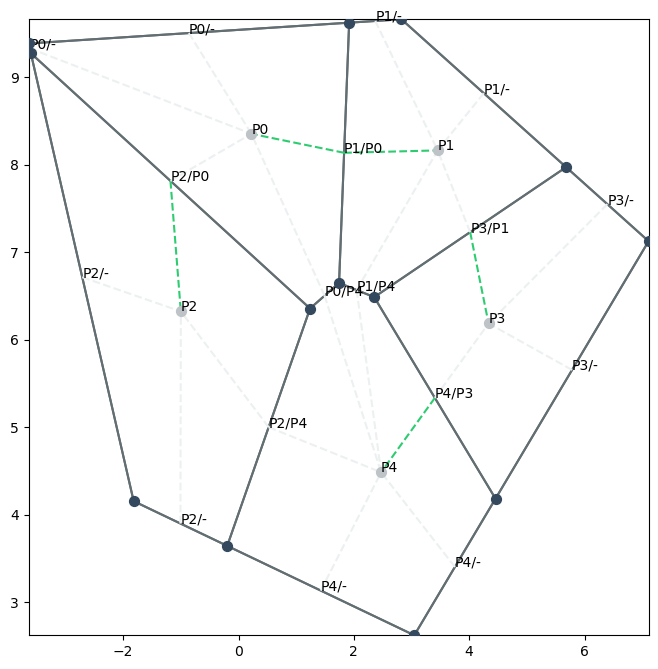

Error = 0.7204054960657366
Generating points given by: 
(0.2234855795644041, 8.354086596063524),
(3.4534070789674294, 8.16420505117318),
(2.4730908543911387, 4.484872682196763),
(4.33625526060413, 6.186522627458713),
(-1.0001598649679926, 6.3235174815487785)
---------------------
Setting up sub placentones for 4


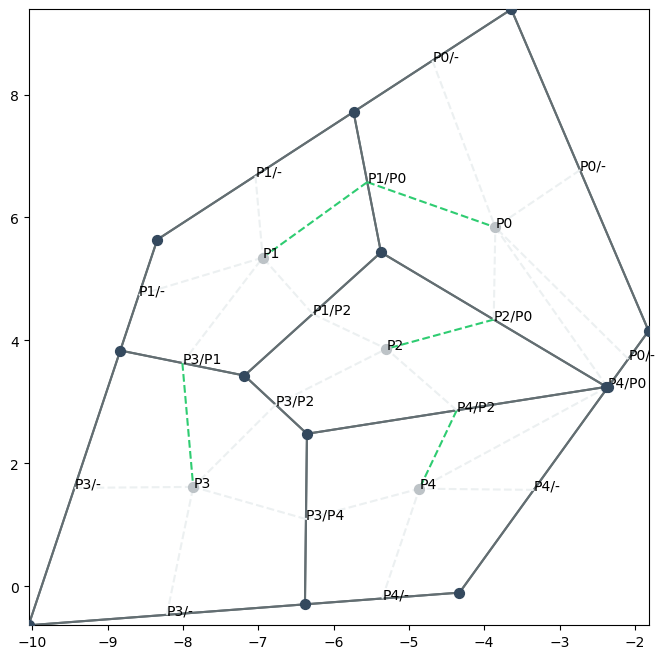

Error = 0.5818026344672061
Generating points given by: 
(-7.862509772659197, 1.6169977066856291),
(-6.939914295260083, 5.347512046417944),
(-4.860353452841913, 1.5881803279794016),
(-5.297448715923422, 3.863170759751536),
(-3.8527537576528728, 5.839446456069679)
---------------------
Setting up sub placentones for 5


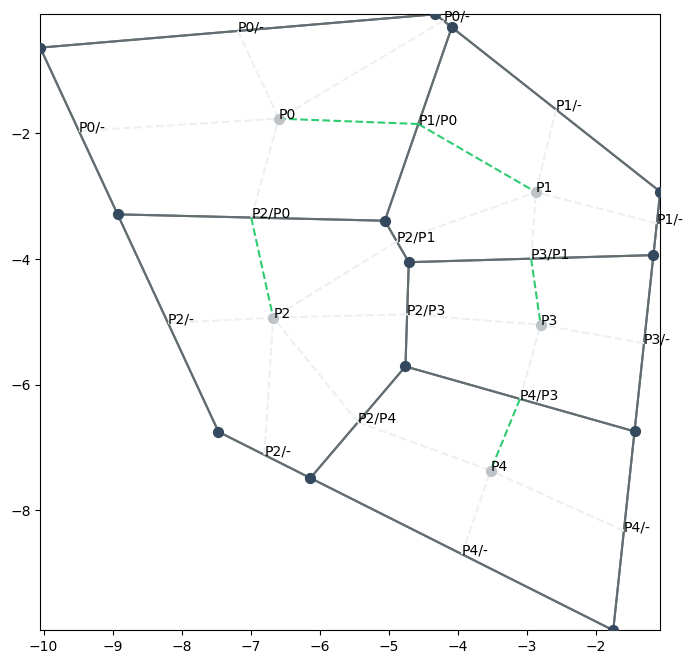

Error = 0.6282408802262085
Generating points given by: 
(-3.527965148802724, -7.370616571608503),
(-6.59221571209868, -1.7650912493239483),
(-6.67541166439114, -4.934419603011844),
(-2.803529284979822, -5.0480947090965635),
(-2.870766043558298, -2.9356092555308786)
Adding sub placentone 0 / 29
Placentone_no: 0
stop_at_veins_added: 2
no_vein_to_add: 2
vein_power: 0
Found curve: 194
WARNING - total no. of curves found with centre [7.78061233 1.17152361 2.31734466] is 2
Curves found are [1, 16]
Found curve: 16
Found surf: 66
Found curve: 15
WARNING - total no. of curves found with centre [7.40073775 2.67197987 2.31734466] is 2
Curves found are [1, 17]
Found curve: 17
Found surf: 68
Adding sub placentone 1 / 29
Placentone_no: 1
stop_at_veins_added: 2
no_vein_to_add: 1
vein_power: 2
Found curve: 274
WARNING - total no. of curves found with centre [5.08367747 1.75685163 1.03342246] is 2
Curves found are [1, 8]
Found curve: 8
Found surf: 26
Adding sub placentone 2 / 29
face:  [(2, 239)]
Found

AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
import importlib

import placenta_main as pm

importlib.reload(pm)

mesh_success = False
        
while not mesh_success:
    try:
        mesh_success = pm.main()
    except (Exception, AttributeError) as e:
        print(f"Error occurred somewhere: {e}")
        mesh_success = False


In [ ]:
# REMEMBER THAT FORONOI/POLYGON.PY _get_intersection_.. NEED TO BE CHANGED TO
'''
    def _get_intersection_point(self, orig, end):
        p = self.points + [self.points[0]]
        points = []

        point = None

        for i in range(0, len(p) - 1):
            intersection_point = Algebra.get_intersection(orig, end, p[i], p[i + 1])
            if intersection_point:
                points.append(intersection_point)

        if len(points) == 0:
            point = None
        elif len(points) == 1:  # this is the actual change
            point = points[0]
        else:
            max_distance = Algebra.distance(orig, end)

            # Find the intersection point that is furthest away from the start
            if points:
                distances = [Algebra.distance(orig, p) for p in points]
                distances = [i for i in distances if i <= max_distance]
                if distances:
                    point = points[np.argmax(distances)]

        return point
'''
# Otherwise can randomly get empty cell

# Ideas that haven't worked out / save for future



'''
# Set the no-slip boundary on the assumption that the inlet, outlet boudaries are at the end of model.occ.getEntities(dim=2)
# If this ends up not being the case, another approach is to store the inlet, outlet GMSH labels, loop through model.occ.getEntities(dim=2)
# for boundary labels which don't belong to inlet, outlet and set that to 0
surface_label_pairs = model.occ.getEntities(dim=2)
no_surface_label_pairs = len(surface_label_pairs)
no_noslip_surfaces = no_surface_label_pairs-no_inlets_outlets
noslip_labels = [pair[1] for pair in surface_label_pairs[0:no_noslip_surfaces]]
#model.addPhysicalGroup(2, noslip_labels, 1, "Noslip")
#print("no slip boundary labels: ",noslip_labels)

start_inlet_no = model.occ.getMaxTag(2)-no_inlets_outlets+1
print("start_inlet_no: ",start_inlet_no)
#for inlet_no in range(0,no_inlets):
#    model.addPhysicalGroup(2, [start_inlet_no+inlet_no], 2+inlet_no, "Inlet")
    #print("adding surface no ",start_inlet_no+inlet_no," as inlet with bdry_no ",2+inlet_no)

start_outlet_no = model.occ.getMaxTag(2)-no_outlets+1
print("start_outlet_no: ",start_outlet_no)
#for outlet_no in range(0,no_outlets):
#    model.addPhysicalGroup(2, [start_outlet_no+outlet_no], 101+outlet_no, "Outlet")
    #print("adding surface no ",start_outlet_no+outlet_no," as outlet with bdry_no ",2+outlet_no)
'''







'''
# IsInside doesn't work properly if there isn't a node on the surface, presume related to https://gitlab.onelab.info/gmsh/gmsh/-/issues/1246
surfs = model.occ.getEntities(dim=2)
no_surfs = len(surfs)
print(surfs)
for i in range(0,no_surfs):
    inside = False
    print("i = ",i)
    pair = surfs[i]
    inside = model.isInside(2,pair[1],TEST_vein_pt)
    if (inside):
        print("INSIDE: ",pair[1])
'''



""" TEST """
#model.occ.fuse([(3,1)],[(1,2)])

#def removeEmbedded(dimTags, dim=-1):
#def getEmbedded(dim, tag):
#def removeDuplicateNodes(dimTags=[])
#def removeDuplicateElements(dimTags=[])
#def remove(tag)
#def list():

#model.occ.removeAllDuplicates()    
#model.occ.healShapes()    
    
#model.occ.addPoint(0.0,0.0,100.0,DomSize,curr_pt)
#model.occ.remove([(0,curr_pt)], recursive=False)
#print(model.mesh.getEmbedded(3, 1))
#model.mesh.removeEmbedded([(80)], dim=-1)    
 
    
"""    
fig = matplotlib.pyplot.figure(figsize=(10,10))
axis = matplotlib.pyplot.axes()
axis.set_xlim(-placenta_radius,placenta_radius)
axis.set_ylim(-placenta_radius,placenta_radius)

matplotlib.pyplot.plot(frni_placentone.centroid[0],frni_placentone.centroid[1],'bo')
for vertex_no in range(0,frni_placentone.no_vertices):
    matplotlib.pyplot.plot(frni_placentone.vertices[0,vertex_no],frni_placentone.vertices[1,vertex_no],'go')
    matplotlib.pyplot.plot(frni_placentone_shrunk.vertices[0,vertex_no],frni_placentone_shrunk.vertices[1,vertex_no],'ro')

matplotlib.pyplot.show()
"""